# Building a Classifier from a Dataset to Predict the Absence or Presence of Heart Disease

## Introduction:

### Background Information:
Cardiovascular diseases remain the leading cause of death globally. Cardiovascular diseases encompass many different heart conditions which are characterized by several different variables. Therefore, it becomes difficult to characterize an individual with specific conditions as having heart disease. Because of this, data sets and corresponding algorithms are essential tools for physicians, researchers, and other healthcare workers when characterizing or diagnosing a condition such as heart disease.

### Research Question:
We attempt to answer the following question using a data set from Cleveland, Ohio regarding heart disease statistics: Considering a patient’s age, resting blood pressure, and serum cholesterol, will the heart disease diagnosis be classified as absent (FALSE) or present (TRUE)?

### Data set description:
The data set is from the 1980s and describes 14 different variables for patients who may have heart disease. We will utilize the patient's age, resting blood pressure, and serum cholesterol levels to ultimately create a classification that can aid us in answering the question posed above. These variables were chosen as they seemed the most intuitive to correlate with the risk of heart disease; age, high blood pressure, and elevated serum cholesterol levels have been shown to increase a person’s risk of developing heart disease according to different health organizations and scientific papers.

In [167]:
library(tidyverse)
library(repr)
library(scales)
library(tidymodels)

ERROR: Error in library(ggplot): there is no package called ‘ggplot’


In [129]:
URL <- ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")

loaded_data <- read_csv(URL) 
    colnames(loaded_data) <- c("Age", "Sex","Chest_Pain_Type","Resting_Blood_Pressure","Serum_Cholestrol","Fasting_Blood_Sugar", "Resting_Electrocadriographic_Results", "Maximum_Heart_Rate_Achieved","Excercise_Induced_Angina", "ST_Depression_Induced","Slope_of_Peak_Exercise_ST_Segment", "#_of_Major_Vessels", "Defects", "Diagnosis_of_Heart_Disease")
head(loaded_data)

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar,Resting_Electrocadriographic_Results,Maximum_Heart_Rate_Achieved,Excercise_Induced_Angina,ST_Depression_Induced,Slope_of_Peak_Exercise_ST_Segment,#_of_Major_Vessels,Defects,Diagnosis_of_Heart_Disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


In [132]:
# We then constructed binary results (TRUE-> Present or FALSE-> Absent) for the Diagnosis_Heart_Disease column instead of having a range of numbers.
# We did this because in the original data set the numbers (1-4) represented heart disease severity, and we just wanted the presence or absence so we grouped them.
mutated_cleveland_heart <- loaded_data |>
    mutate(Diagnosis = Diagnosis_of_Heart_Disease != 0)

head(mutated_cleveland_heart)

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar,Resting_Electrocadriographic_Results,Maximum_Heart_Rate_Achieved,Excercise_Induced_Angina,ST_Depression_Induced,Slope_of_Peak_Exercise_ST_Segment,#_of_Major_Vessels,Defects,Diagnosis_of_Heart_Disease,Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<lgl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,FALSE
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,TRUE


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

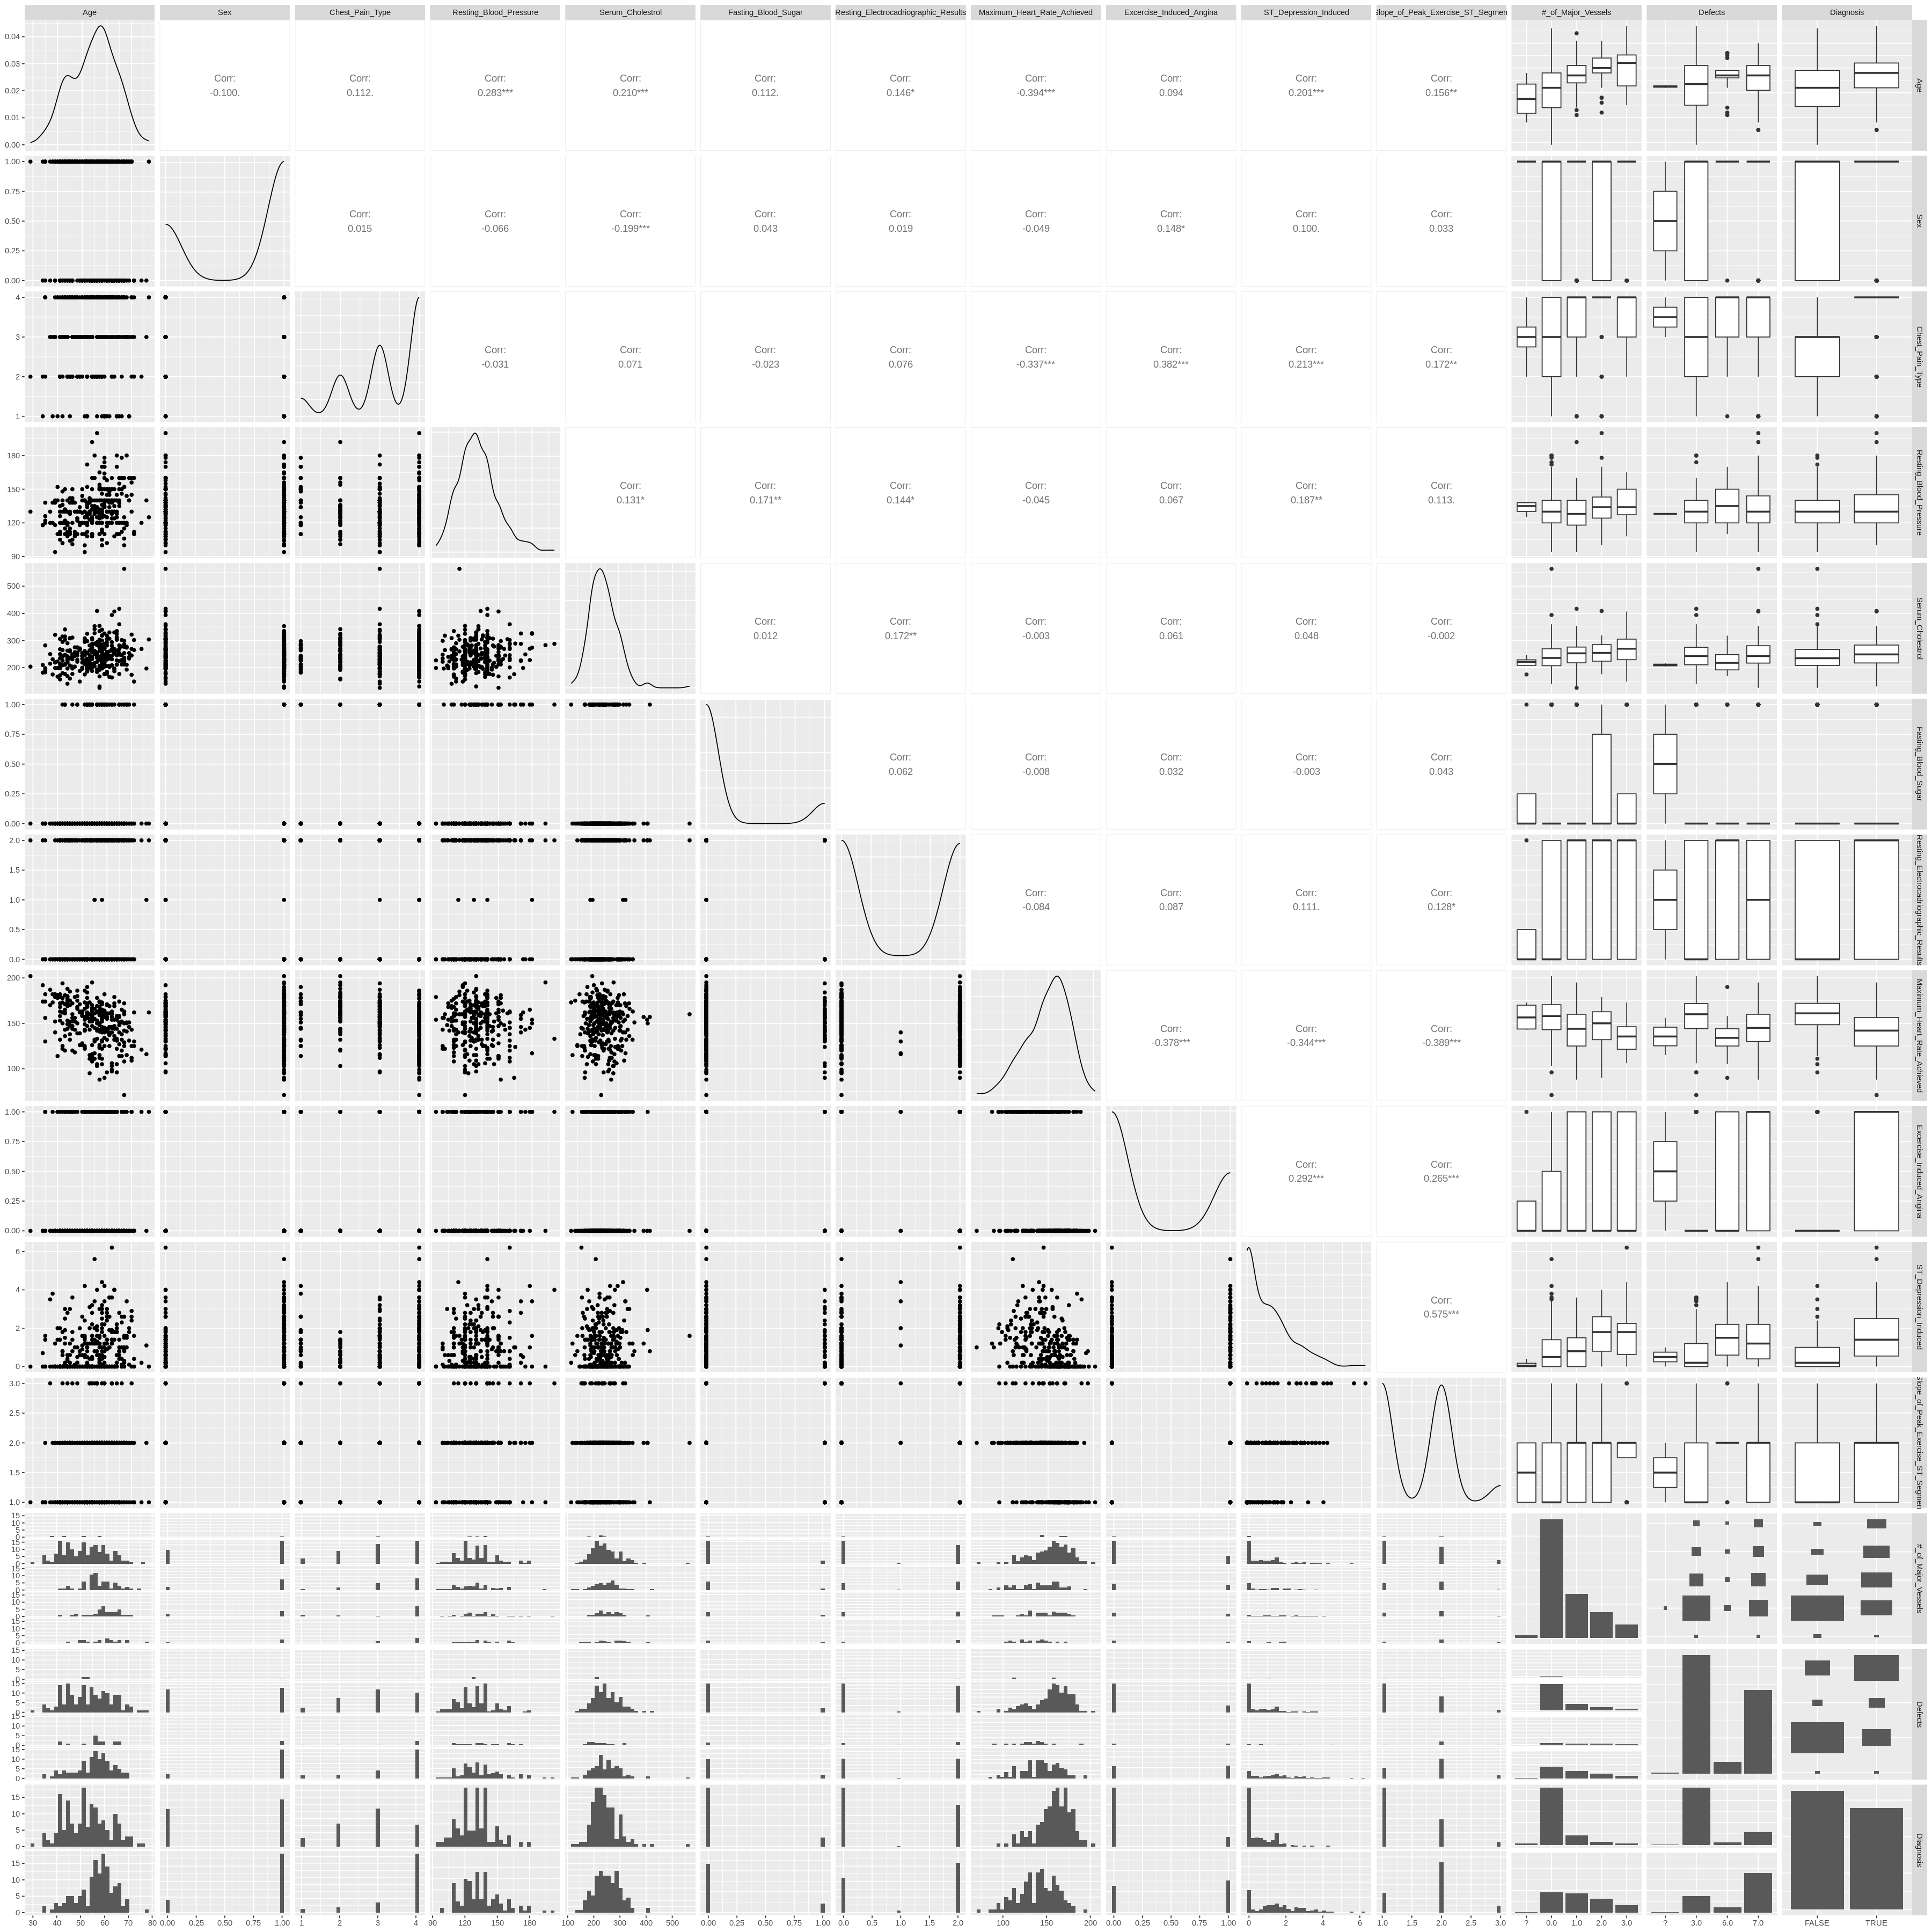

In [197]:
options(repr.plot.height = 30, repr.plot.width = 30)
variable_relationship <- mutated_cleveland_heart |>
    select(-Diagnosis_of_Heart_Disease) |>
    ggpairs()

variable_relationship

In [135]:
#We then selected the variables that we need to build a model and we changed the diagnosis of Heart Disease to a factor data type instead of logic.
cleveland_heart_cleaned <- mutated_cleveland_heart |>
    select(Age, Maximum_Heart_Rate_Achieved, Diagnosis)|>
    mutate("Diagnosis" = as_factor(Diagnosis))
head(cleveland_heart_cleaned)

Age,Maximum_Heart_Rate_Achieved,Diagnosis
<dbl>,<dbl>,<fct>
67,108,TRUE
67,129,TRUE
37,187,FALSE
41,172,FALSE
56,178,FALSE
62,160,TRUE


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


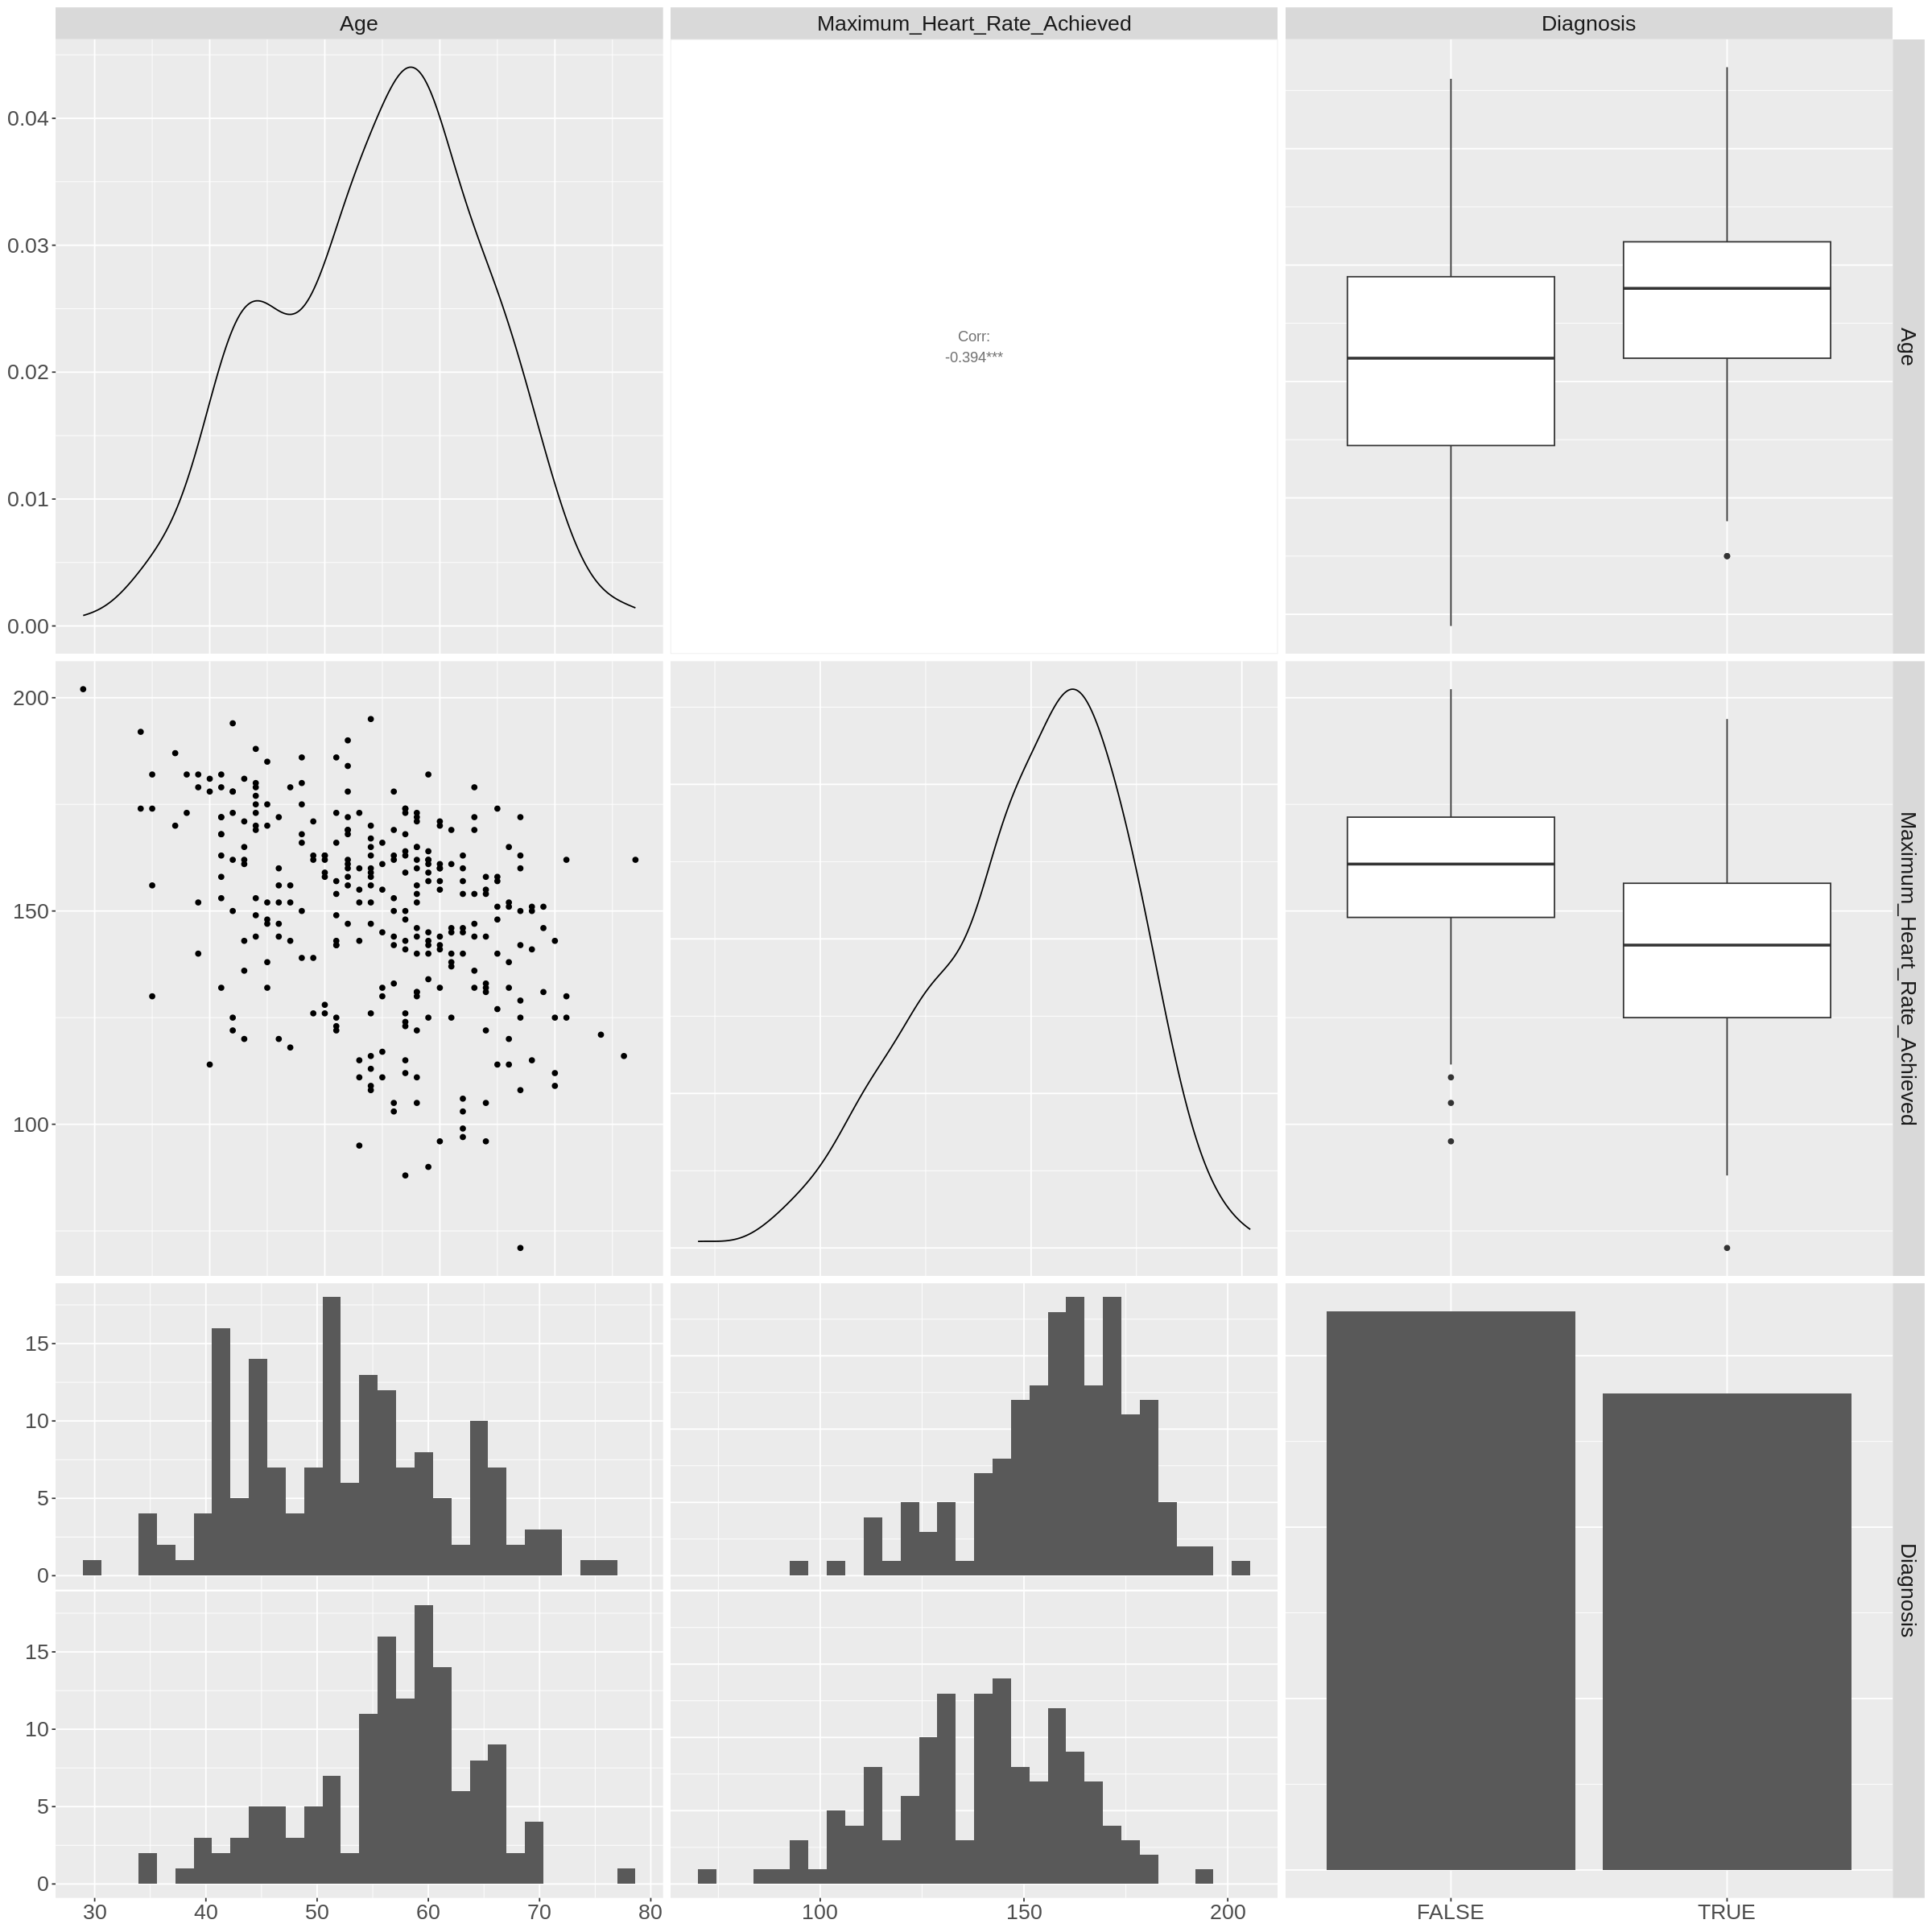

In [ ]:
options(repr.plot.height = 20, repr.plot.width = 20)
predictor_relationships <- cleveland_heart_cleaned |>
    select(Age:Diagnosis) |>
    ggpairs() +
    theme(text = element_text(size = 20))

predictor_relationships

In [198]:
#The mean of each predictor was taken from the training data and grouped by age to see any trends.
training_heart_mean <- cleveland_heart_cleaned |>
    group_by(Diagnosis) |>
    summarize(Maximum_Heart_Rate_Achieved = mean(Maximum_Heart_Rate_Achieved),
             Age = mean(Age))
head(training_heart_mean)

Diagnosis,Maximum_Heart_Rate_Achieved,Age
<fct>,<dbl>,<dbl>
FALSE,158.4294,52.52147
TRUE,139.2590,56.62590


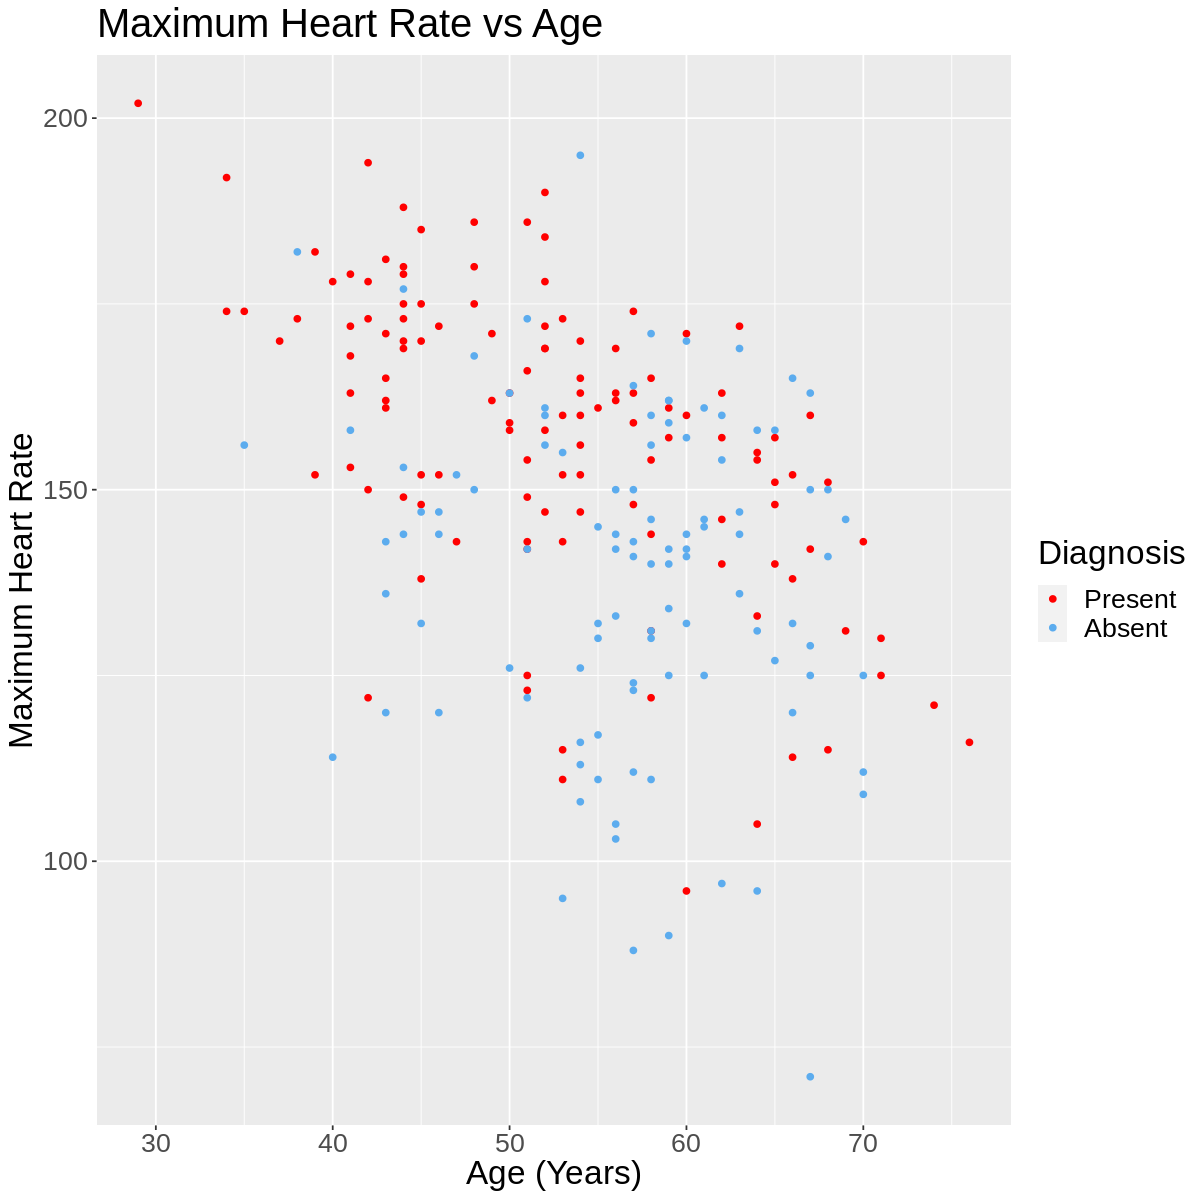

In [195]:
# We then visualized if there is any relationship between the predictors and the results from the training data set
# This graph is Serum_Cholestrol, Resting_Blood_Pressure vs Diagnosis (Present = TRUE, Absent = FALSE)
options(repr.plot.height = 10, repr.plot.width = 10)
heart_plot <- heart_train |>
  ggplot(aes(x = Age, y = Maximum_Heart_Rate_Achieved, color = Diagnosis)) +
  geom_point(alpha = 1) +
  labs(x = "Age (Years)" , y= "Maximum Heart Rate", color = "Diagnosis") +
  scale_color_manual(labels = c("Present", "Absent"), 
                     values = c("red", "steelblue2")) + 
    theme(text = element_text(size = 20)) +
    ggtitle("Maximum Heart Rate vs Age")

heart_plot

In [176]:
# We then split the data set to a training and testing set randomly.
set.seed(2023)

heart_split <- initial_split(cleveland_heart_cleaned, prop = 0.75, strata = Diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

glimpse(heart_train)
glimpse(heart_test)

Rows: 226
Columns: 3
$ Age                         <dbl> 57, 57, 44, 57, 54, 49, 50, 66, 43, 59, 44…
$ Maximum_Heart_Rate_Achieved <dbl> 163, 148, 173, 174, 160, 171, 158, 114, 17…
$ Diagnosis                   <fct> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
Rows: 76
Columns: 3
$ Age                         <dbl> 67, 37, 41, 56, 56, 52, 48, 64, 58, 58, 58…
$ Maximum_Heart_Rate_Achieved <dbl> 108, 187, 172, 178, 153, 162, 139, 144, 16…
$ Diagnosis                   <fct> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, F…


- Here we wanted to ensure that the training set had the same proportion in each of the classses (FALSE and TRUE) as they present in the training data set.

In [177]:
training_set_proportions <- heart_train |>
                      group_by(Diagnosis) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(training_heart))
training_set_proportions

Diagnosis,n,percent
<fct>,<int>,<dbl>
FALSE,122,53.9823
TRUE,104,46.0177


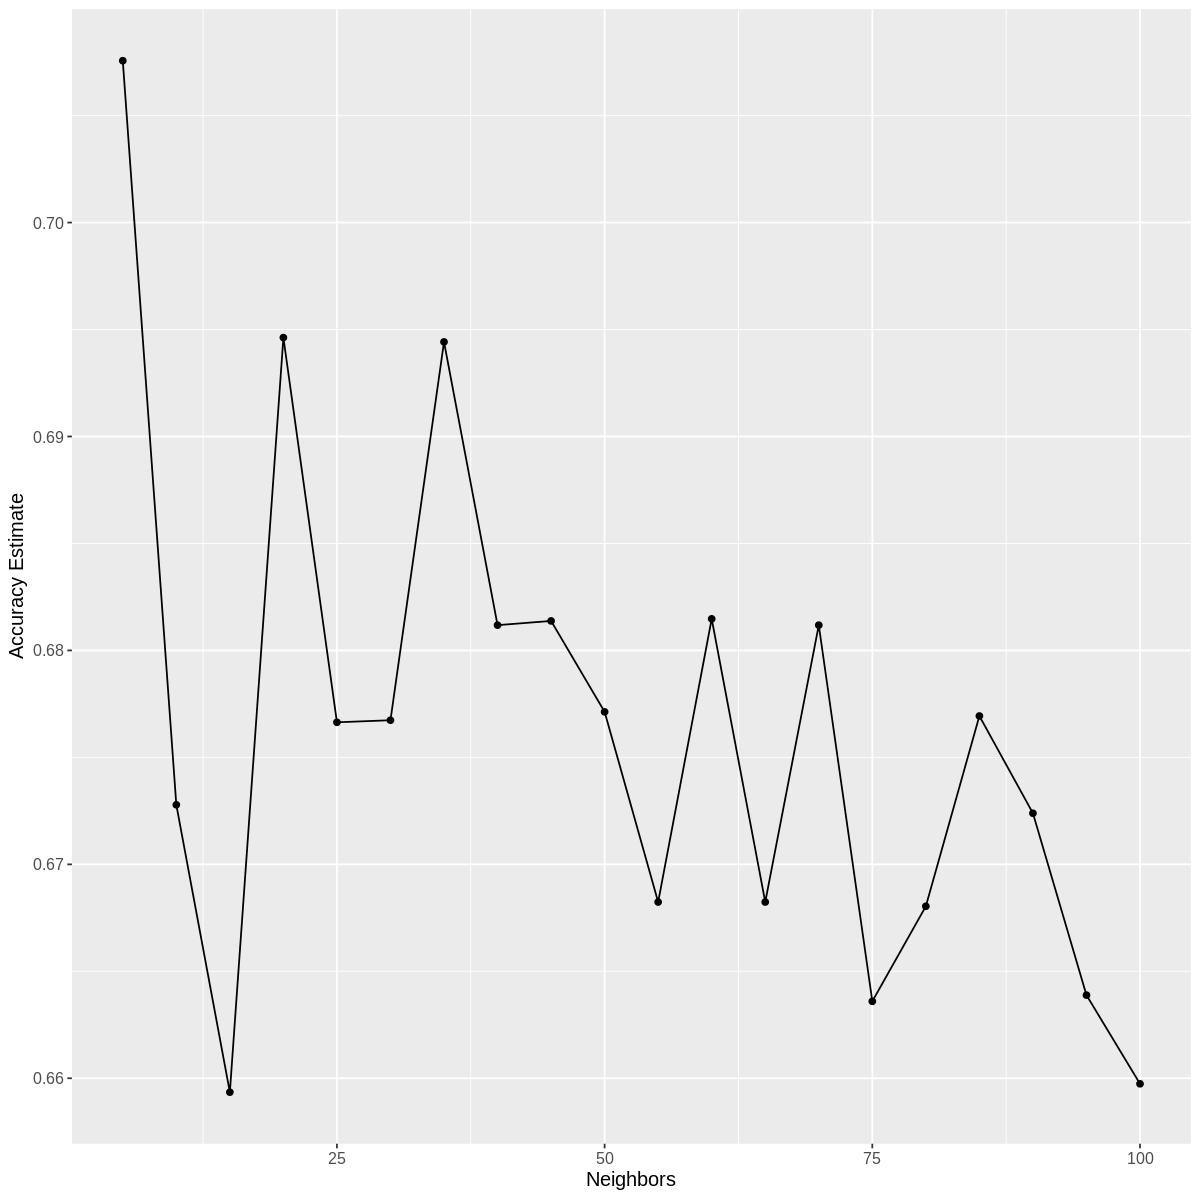

In [190]:
#Set the seed. Don't remove this!
set.seed(2023)

k_vals <- tibble(neighbors = seq(from = 5, to = 100, by = 5))
options(repr.plot.height = 10, repr.plot.width = 10)

knn_tune <- nearest_neighbor(weight_func = "rectangular", 
                            neighbors = tune()) |>
                            set_engine("kknn") |>
                            set_mode("classification")

new_diagnosis_recipe <- recipe(Diagnosis ~ ., data = heart_train) |>
                                step_scale(all_predictors()) |>
                                step_center(all_predictors())

diagnosis_vfold <- vfold_cv(heart_train, v = 5, strata = Diagnosis)

diagnosis_analysis <- workflow() |>
                    add_recipe(new_diagnosis_recipe) |>
                    add_model(knn_tune) |>
                    tune_grid(resamples = diagnosis_vfold, grid = k_vals)

accuracies <- diagnosis_analysis |>
                collect_metrics() |>
                filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x = "Neighbors", y = "Accuracy Estimate") + 
                    theme(text = element_text(size = 12))

cross_val_plot

In [186]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 20) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(new_diagnosis_recipe) |>
  add_model(knn_spec) |>
  fit(data = heart_train)

diagnosis_test_predictions <- predict(knn_fit, heart_test) |>
  bind_cols(heart_test)

head(diagnosis_test_predictions)

.pred_class,Age,Maximum_Heart_Rate_Achieved,Diagnosis
<fct>,<dbl>,<dbl>,<fct>
TRUE,67,108,TRUE
FALSE,37,187,FALSE
FALSE,41,172,FALSE
FALSE,56,178,FALSE
FALSE,56,153,FALSE
FALSE,52,162,FALSE


In [187]:
diagnosis_test_predictions |>
  metrics(truth = Diagnosis, estimate = .pred_class) |>
  filter(.metric == "accuracy")

confusion <- diagnosis_test_predictions |>
             conf_mat(truth = Diagnosis, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7763158


          Truth
Prediction FALSE TRUE
     FALSE    33    9
     TRUE      8   26

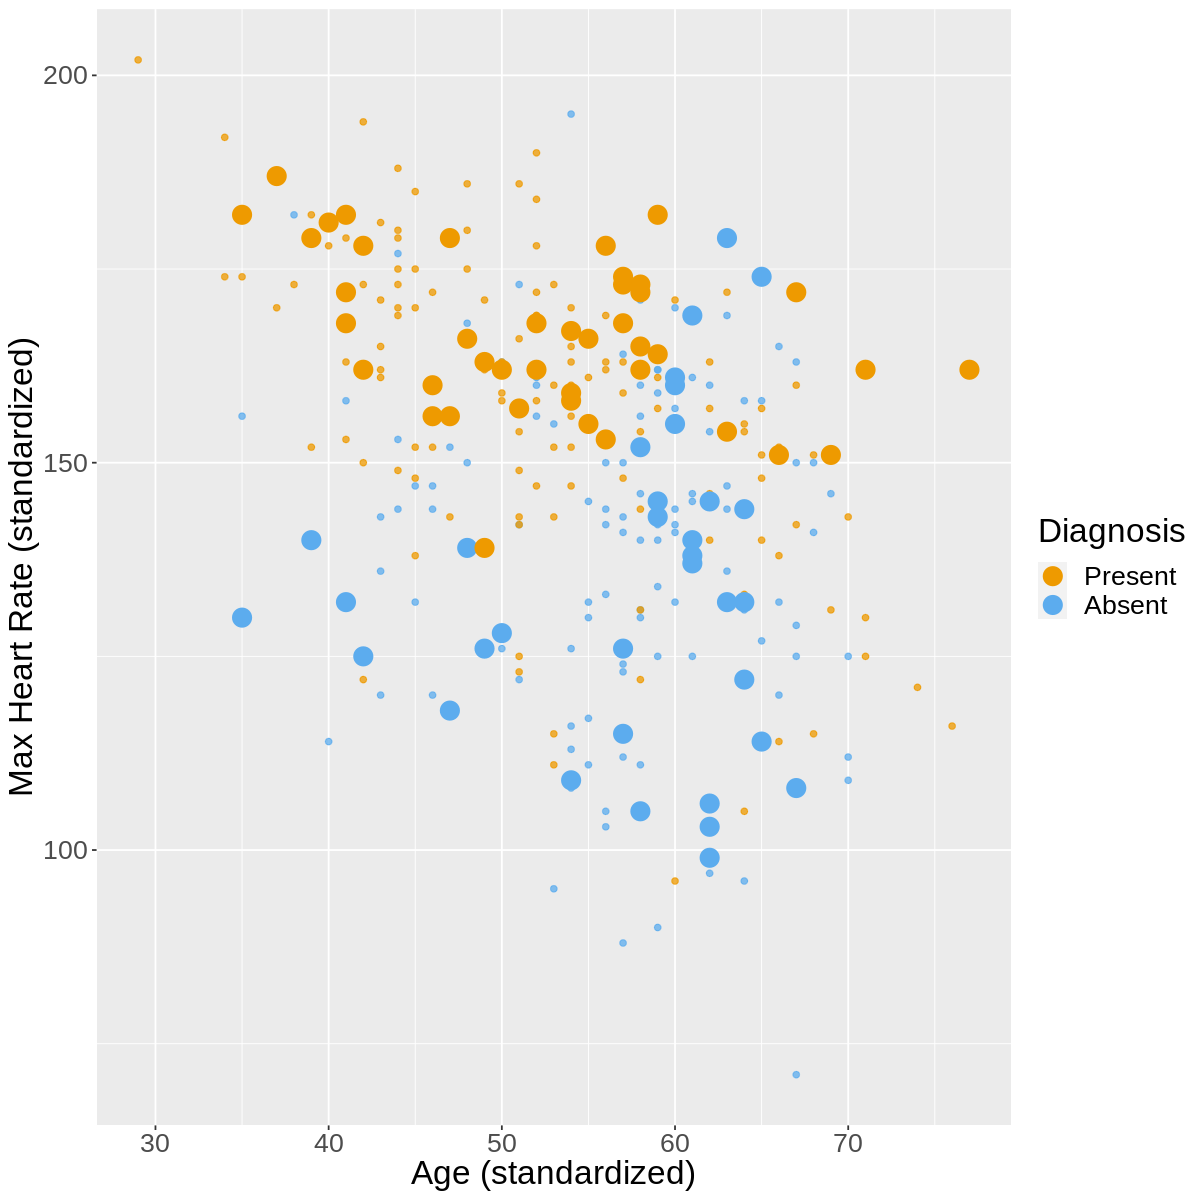

In [221]:
# plot:
# 1. the colored scatter of the original data
# 2. the faded colored scatter for the grid points
options(repr.plot.height = 10, repr.plot.width = 10)

wkflw_plot <-
  ggplot() +
  geom_point(data = cleveland_heart_cleaned, 
             mapping = aes(x = Age, 
                           y = Maximum_Heart_Rate_Achieved, 
                           color = Diagnosis), 
             alpha = 0.75) +
  geom_point(data = diagnosis_test_predictions, 
             mapping = aes(x = Age, 
                           y = Maximum_Heart_Rate_Achieved, 
                           color = .pred_class), 
             alpha = 1, 
             size = 5) +
    labs(color = "Diagnosis", 
         x = "Age (standardized)", 
         y = "Max Heart Rate (standardized)") +
    scale_color_manual(labels = c("Present", "Absent"), values = c("orange2", "steelblue2")) +
    theme(text = element_text(size = 20))

wkflw_plot

## Methods:
We will use age, resting blood pressure, and serum cholesterol as variables and compare all of these factors against the heart disease diagnosis, in order to determine whether or not they have an impact on heart disease diagnosis. One way to visualize this would be to make a histogram of each category against the heart disease diagnosis, to see if increasings blood pressure, for example, has a correlation on the diagnosis.

The steps we will perform to complete our project include: 
1. Split the dataset into testing and training data
2. Determine which k to use; test different k values - plot the k vs. accuracy
3. With the best value of k (nearest neighbour, recipe), make a model with the training set
4. Make a prediction based on the model
5. Test it using the testing data
6. Compare our results with the results from the testing dataset for accuracy

## Expected outcomes and significance:

#### What do you expect to find?
- We expect to see a positive correlation in age, resting blood pressure, and serum cholesterol levels with the risk of heart disease which aligns with previous research papers. In other words, each variable will have its own positive correlation with the risk of heart disease.

#### What impact could such findings have?
- These findings can be used to consider the factors that could influence the general public's risk of heart disease. For example, if there is a significant spike in the presence of heart disease after a certain age, then it could be recommended for people near that age to closely monitor their heart health and receive regular checkups.

#### What future questions could this lead to?
- If a significant correlation appears between a variable and the presence of heart disease, then the next step would be to conduct further research to examine the underlying biological cause of this observed trend.

### References:
- National Center for Chronic Disease Prevention and Health Promotion, Division for Heart Disease and Stroke Prevention. (2023, Feb. 24). Heart Disease. cdc.gov. https://www.cdc.gov/heartdisease/index.htm#:~:text=The%20term%20%E2%80%9Cheart%20disease%E2%80%9D%20refers,%2C%20in%20some%20cases%2C%20medicine
- National Institute of Health, Heart Health and Aging. (2018, June 1). https://www.nia.nih.gov/health/heart-health-and-aging#:~:text=Adults%20age%2065%20and%20older,risk%20of%20developing%20cardiovascular%20disease
- UCI Machine Learning Repository. (Accessed 2023, Feb. 24). Heart Disease Data Set. https://archive.ics.uci.edu/ml/datasets/Heart+Disease
- World Health Organization. (2021, June 11). Cardiovascular diseases (CVDs). World Health Organization. https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)